In [1]:
# PMF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
gss=pd.read_hdf('gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [6]:
# Plot a historam

In [7]:
educ=gss['educ']

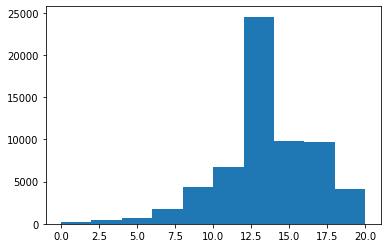

In [9]:
plt.hist(educ.dropna(),label='educ')
plt.show()

In [10]:
# Pmf

In [15]:
pmf_educ=educ.value_counts().sort_index()
pmf_educ.head()

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: educ, dtype: int64

In [16]:
pmf_educ[12]

19145

In [17]:
pmf_educ.max()

19145

In [18]:
pmf_educ=educ.value_counts(normalize=True).sort_index()
pmf_educ.head()

0.0    0.002311
1.0    0.000610
2.0    0.002424
3.0    0.003948
4.0    0.004655
Name: educ, dtype: float64

In [19]:
pmf_educ[12]

0.3072836414997432

[]

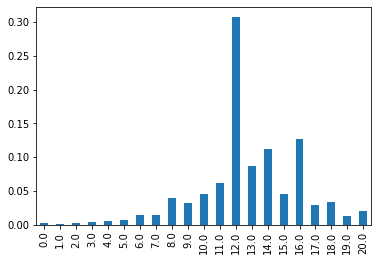

In [21]:
pmf_educ.plot(kind='bar')
plt.plot()

In [22]:
# Note: PMF is better the histogram

In [23]:
# do the above for age

In [24]:
age = gss['age']

In [26]:
pmf_age=age.value_counts(normalize=True).sort_index()
pmf_age.head()

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
Name: age, dtype: float64

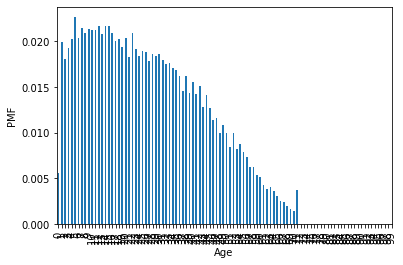

In [29]:
pmf_age.plot(kind='bar',xticks=[x for x in range(0,100)])
# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')

plt.show()


In [35]:
# Cdf
import numpy as np

In [31]:
age = gss['age']

In [40]:
count,bin_count=np.histogram(age.dropna(),bins=10)

In [59]:
count

array([9192, 9269, 8777, 8269, 7726, 6617, 5198, 3774, 2187, 1272],
      dtype=int64)

In [60]:
bin_count

array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ])

In [41]:
pdf=count/sum(count)

In [45]:
pdf

array([0.14758915, 0.14882548, 0.1409258 , 0.13276922, 0.12405067,
       0.10624428, 0.08346045, 0.06059633, 0.03511504, 0.02042356])

In [42]:
cdf=np.cumsum(pdf)

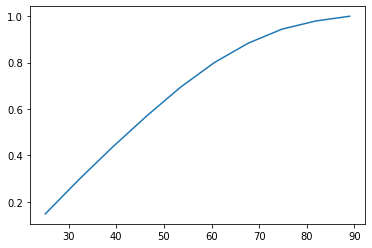

In [43]:
plt.plot(bin_count[1:],cdf)
plt.show()

In [83]:
# use of cdf and ppf functions in scipy.stats

In [70]:
from scipy.stats import norm

In [71]:
age = gss['age'].dropna()

In [74]:
# what percentage of people are less than 90?

In [72]:
norm.cdf(90,age.mean(),age.std())

0.9960516736003322

In [75]:
# what percentage of people are less then 60?

In [73]:
norm.cdf(60,age.mean(),age.std())

0.8157319039061022

In [76]:
# what percentage of people are greater than 60?

In [77]:
1-norm.cdf(60,age.mean(),age.std())

0.18426809609389783

In [78]:
# calculating percentile

In [79]:
# What age are 81% of people less than? 

In [82]:
norm.ppf(0.8157,age.mean(),age.std())

59.997954568202445

In [46]:
# another example

In [47]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
x=np.random.randn(10000)

In [49]:
norm_cdf=scipy.stats.norm.cdf(x)

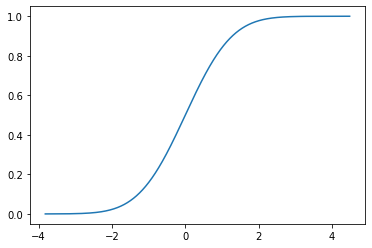

In [50]:
sns.lineplot(x=x,y=norm_cdf)
plt.show()

In [51]:
# Comparing PMF's

In [84]:
# age

In [89]:
male=gss['sex']==1
age=gss['age']
male_age=age[male]
male_age.head()

0    26.0
2    57.0
4    59.0
5    46.0
8    85.0
Name: age, dtype: float64

In [91]:
# or
male_age=gss[gss['sex']==1]['age']
male_age.head()

0    26.0
2    57.0
4    59.0
5    46.0
8    85.0
Name: age, dtype: float64

In [92]:
female_age=age[~male]
female_age.head()

1     38.0
3     61.0
6     43.0
7     72.0
11    64.0
Name: age, dtype: float64

In [96]:
# or
female_age=gss[gss['sex']!=1]['age']
female_age.head()

1     38.0
3     61.0
6     43.0
7     72.0
11    64.0
Name: age, dtype: float64

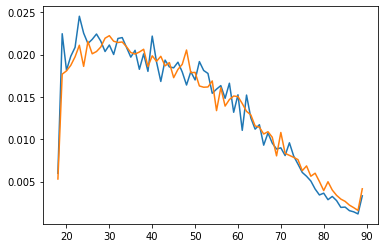

In [98]:
male_age.value_counts(normalize=True).sort_index().plot()
female_age.value_counts(normalize=True).sort_index().plot()
plt.show()

In [99]:
# calculate cdf

In [145]:
count1,bin_count1=np.histogram(male_age.dropna(),bins=10)

In [146]:
pdf1=count1/sum(count1)

In [147]:
cdf1=np.cumsum(pdf1)

In [148]:
count2,bin_count2=np.histogram(female_age.dropna(),bins=10)

In [149]:
pdf2=count2/sum(count2)

In [150]:
cdf2=np.cumsum(pdf2)

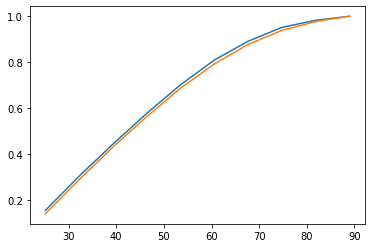

In [151]:
plt.plot(bin_count1[1:],cdf1)
plt.plot(bin_count2[1:],cdf2)
plt.show()

In [112]:
# income distribution

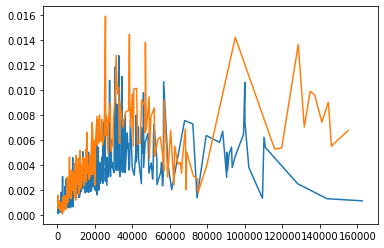

In [152]:
income=gss['realinc']
pre_95=gss['year']<1995
income[pre_95].value_counts(normalize=True).sort_index().plot()
income[~pre_95].value_counts(normalize=True).sort_index().plot()
plt.show()

In [153]:
count1,bin_count1=np.histogram(income[pre_95].dropna(),bins=10)

In [154]:
pdf1=count1/sum(count1)

In [155]:
cdf1=np.cumsum(pdf1)

In [156]:
count2,bin_count2=np.histogram(income[~pre_95].dropna(),bins=10)

In [157]:
pdf2=count2/sum(count2)

In [158]:
cdf2=np.cumsum(pdf2)

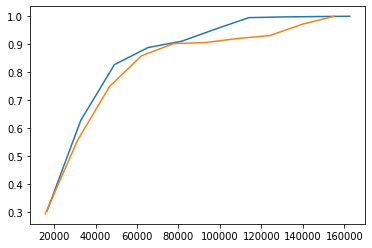

In [159]:
plt.plot(bin_count1[1:],cdf1)
plt.plot(bin_count2[1:],cdf2)

plt.show()

In [160]:
# education

In [161]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = educ<=12
print(high.mean())

0.5308807991547402


In [162]:
# modelling distributions

In [163]:
# normal distribution

In [164]:
sample=np.random.normal(size=1000)

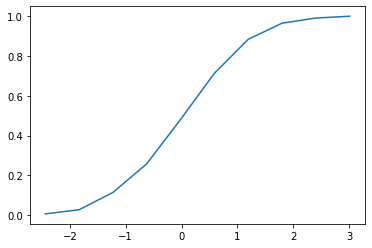

In [165]:
count,bin_count=np.histogram(sample,bins=10)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_count[1:],cdf)
plt.show()

In [166]:
income = gss['realinc']
log_income = np.log10(income)
# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290043733010077


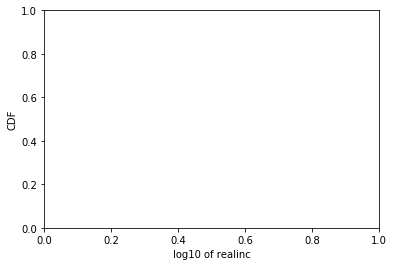

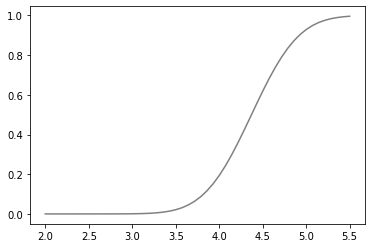

In [168]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()
plt.clf()
plt.plot(xs, ys, color='gray')


In [169]:
# comparing pmfs

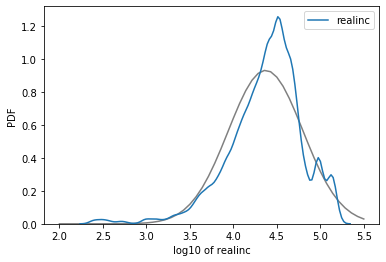

In [170]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

In [2]:
#

In [3]:
brfss=pd.read_hdf('brfss.hdf5','brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [7]:
# scatter plot

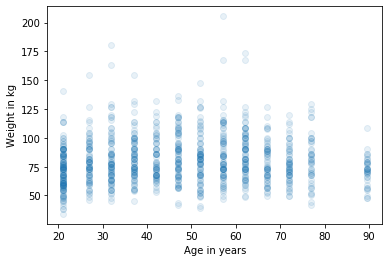

In [18]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

In [8]:
# jittering

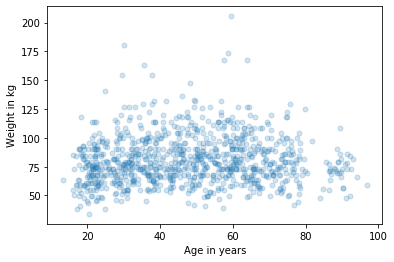

In [19]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

In [4]:
# box plot

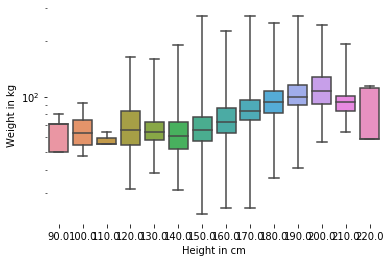

In [6]:
# Drop rows with missing data
import seaborn as sns
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


In [9]:
# violin plot

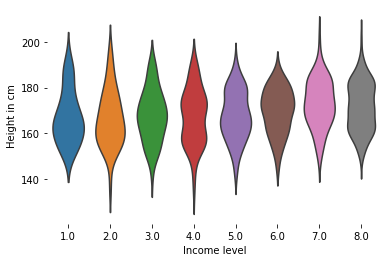

In [20]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


In [10]:
# calculating correlations

In [11]:
# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


In [12]:
# Answer: A and D

In [13]:
# simple regression

In [14]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)


In [15]:
# fit a line

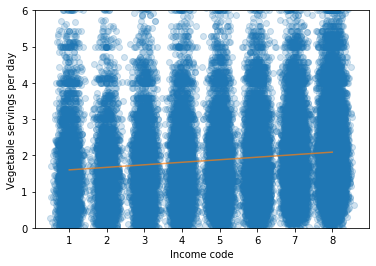

In [17]:
# Plot the scatter plot
import numpy as np
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

## Multivariate Thinking

In [22]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)



LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


In [23]:
# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

Intercept    1.541376
INCOME2      0.070000
dtype: float64


In [24]:
# Multiple regression

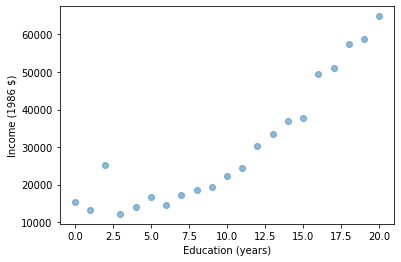

In [26]:
# Plot income and education
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [27]:
# Non-linear model of education

In [29]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [31]:
# Making predictions
# At this point, we have a model that predicts income using age, education, and sex.

# Let's see what it predicts for different levels of education, holding age constant.

In [32]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


In [33]:
# Visualizing predictions
# Now let's visualize the results from the previous exercise!

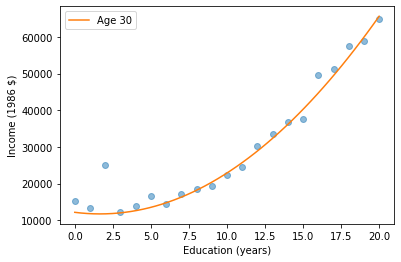

In [34]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [35]:
#

In [36]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


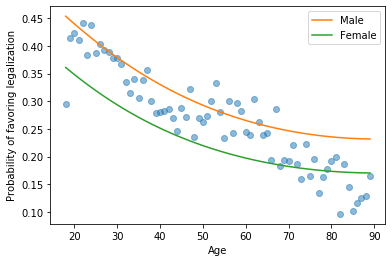

In [37]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

In [38]:
# sampling

In [39]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3,high=3,size=5000)

# Print uniforms
print(uniforms)

[ 0.85962267  2.87872668 -1.68300295 ...  0.17276146  0.35368818
 -0.85530199]


In [40]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5,scale=2,size=5000)

# Print normals
print(normals)

[10.56373752  8.89811027  3.81805401 ...  6.57003731  4.8881563
  4.33185226]


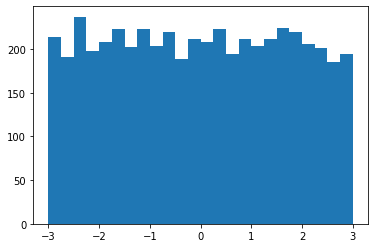

In [41]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms,np.arange(-3,3.25,0.25))
plt.show()

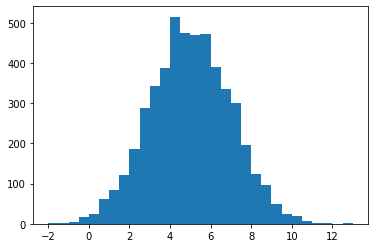

In [42]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals,bins=np.arange(-2,13.5,0.5))
plt.show()

In [43]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)

In [44]:
x

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [45]:
y

array([ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

In [46]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)

In [47]:
x

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [48]:
y

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [49]:
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)

In [50]:
x

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [51]:
y

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [52]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)

In [53]:
x

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [54]:
y

array([-0.6681285 , -0.49820952,  0.61857582,  0.56869225,  1.35050948])